# Structural Dynamics

This Notebook contains solutions to solved examples from **Rao, S.S., _Mechanical Vibrations_, 5ed., Prentice Hall, 2011**. Page numbers refer to the pages from the 5th edition where these examples appear in this edition.

##Example 2.20 (Page 203)

A spring-mass system with a mass of 20 lb-sec$^2$/in and stiffness 500 lb/in is subject to an initial displacement of $x_0 = 3.0$in and an initial velocity of $\dot{x_0}=4.0$in/sec. Plot the time variations of the mass's displacement, velocity and acceleration.

The displacement of an undamped system can be expressed as:

$x(t) = A_0 \sin (\omega_n t + \phi_0)$

where

$\omega_n = \sqrt{\frac{k}{m}} \ \sqrt{\frac{500}{20}} = 5 \text{ rad/s}$

$A_0 = \left[ x_0^2 + \left( \frac{\dot{x_0}}{\omega_n} \right)^2 \right]^{1/2} = \left[ (3.0)^2 + \left( \frac{4.0}{5.0} \right)^2 \right]^{1/2} = 3.1048 \text{ rad}$

$\phi_0 = \tan^{-1} \left( \frac{x_0 \omega_n}{\dot{x_0}} \right) = \tan^{-1} \left( \frac{(3.0)(5.0)}{4.0} \right) = 1.3102 \text{ rad}$

Thus, the equations for displacement, velocity and acceleration are:

$x(t) = 3.1048 \sin(5 t + 1.3102) \text{ in}$

$\dot{x}(t) = 15.524 \cos (5 t + 1.3102) \text{ in/sec}$

$\ddot{x}(t) = -77.62 \sin (5 t + 1.3102) \text{ in/sec}^2$

wn = 5.0000, A0 = 3.1048, phi = 1.3102



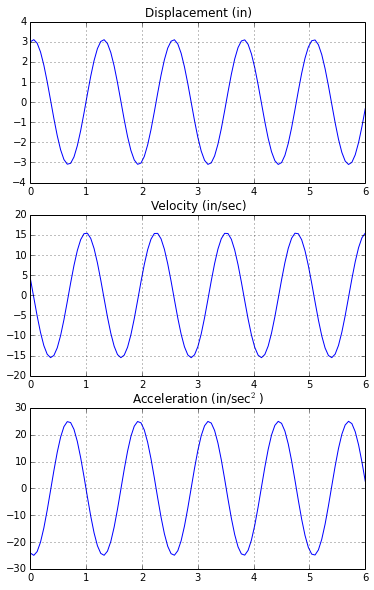

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

m = 20.0
k = 500.0
x0 = 3.0
v0 = 4.0
t_max = 6.0

wn = np.sqrt(k / m)
A0 = np.sqrt(x0**2 + (v0 / wn)**2)
phi = np.arctan(x0 * wn / v0)
print "wn = %.4f, A0 = %.4f, phi = %.4f\n" % (wn, A0, phi)

t = np.linspace(0, t_max, 101)
x = A0 * np.sin(wn * t + phi)
x1 = wn * A0 * np.cos(wn * t + phi)
x2 = -wn**2 * np.sin(wn * t + phi)

fig = plt.figure()
fig.subplots_adjust(bottom=-1)
ax = fig.add_subplot(311)
ax.plot(t, x)
ax.grid()
ax.set_title('Displacement (in)')
ax = fig.add_subplot(312)
ax.plot(t, x1)
ax.grid()
ax.set_title('Velocity (in/sec)')
ax = fig.add_subplot(313)
ax.plot(t, x2)
ax.grid()
ax.set_title('Acceleration (in/sec$^2$)')

plt.show()

## Example 2.22 (Page 207)

Develop a general purpose Python program to find the free vibration response of a viscously damped system. Use the program to find the respons of a system with the following data:

$m = 450.0, \qquad k = 26519.2, \qquad c = 1000.0, \qquad x_0 = 0.539657, \qquad \dot{x}_0 = 1.0$

The response of an underdamped system to initial displacement and velocity is given by the equation:

$x(t) = X e^{- \xi \omega_n t} \cos \left( \omega_d t - \phi \right)$

where

$\omega_n = \sqrt{\frac{k}{m}}, \quad \xi = 2 \sqrt{k m}, \quad \omega_d = \sqrt{1 - \xi^2} \omega_n$

$X = \sqrt{(x_0)^2 + \left( \frac{\dot{x}_0 + \xi \omega_n x_0}{\omega_d} \right)^2}$

$\phi = \tan^{-1}\left( \frac{\dot{x}_0 + \xi \omega_n x_0}{x_0 \omega_d} \right) $

The velocity and acceleration are given by the following expressions:

$\dot{x}(t) = X \left[ -\xi \omega_n e^{-\xi \omega_n t} \cos \left( \omega_d t - \phi \right) - \omega_d e^{-\xi \omega_n t} \sin \left( \omega_d t - \phi \right) \right] = -X e^{-\xi \omega_n t} \left[ \xi \omega_n \cos \left( \omega_d t - \phi \right) + \omega_d \sin \left( \omega_d t - \phi \right) \right]$

$\ddot{x}(t) = X e^{-\xi \omega_n t} \left \lbrace \xi \omega_n \left[ \xi \omega_n \cos(\omega_d t - \phi) + \omega_d \sin(\omega_d t - \phi) \right] + \left[ \xi \omega_n \omega_d \sin(\omega_d t - \phi) - \omega_d^2 \cos(\omega_d t - \phi) \right] \right \rbrace$

which can be simplified to:

$\ddot{x}(t) = X e^{-\xi \omega_n t} \left \lbrace \left[ (\xi \omega_n)^2  - \omega_d^2 \right] \cos(\omega_d t - \phi) + 2 \xi \omega_n \omega_d \sin(\omega_d t - \phi) \right \rbrace$

wn = 7.67668910114  xi = 0.144738323576  wd = 7.59585331969  X = 0.579291184991  phi = 0.372056852101

              Time Displacement     Velocity Acceleration
---------------------------------------------------------
    0     0.000000     0.539657     1.000000   -34.025049
    1     0.025000     0.554099     0.159616   -33.008628
    2     0.050000     0.547970    -0.641054   -30.868135
    3     0.075000     0.522599    -1.375559   -27.740767
    4     0.100000     0.479933    -2.021239   -23.791561
......
   96     2.400000     0.022033     0.231390    -1.812621
   97     2.425000     0.027228     0.183409    -2.012170
   98     2.450000     0.031170     0.131471    -2.129064
   99     2.475000     0.033786     0.077643    -2.163596
  100     2.500000     0.035053     0.023951    -2.118982


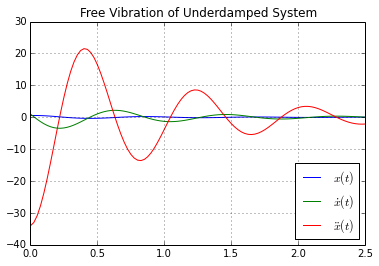

In [5]:
def damped_freevib(m, c, k, x0, v0, t_max, npoints, prn=True):
    wn = np.sqrt(float(k) / float(m))
    xi = c / (2.0 * np.sqrt(k * m))
    wd = np.sqrt(1.0 - xi**2) * wn
    C1 = x0
    C2 = (v0 + xi * wn * x0) / wd
    X = np.sqrt(C1**2 + C2**2)
    phi = np.arctan(C2 / C1)

    if prn:
        print 'wn =', wn, ' xi =', xi, ' wd =', wd, ' X =', X, ' phi =', phi

    t = np.linspace(0, t_max, npoints)
    xiwnt = xi * wn * t
    wdtp = wd * t - phi
    x = X * np.exp(-xiwnt) * np.cos(wdtp)
    x1 = -X * np.exp(-xiwnt) * (xi*wn* np.cos(wdtp) + wd * np.sin(wdtp))
    x2 = X * np.exp(-xiwnt) * ( ((xi*wn)**2 - wd**2)*np.cos(wdtp) + 2*xi*wn*wd*np.sin(wdtp) ) # Wrong. Check derivation
    return t, x, x1, x2

m = 450.0; k = 26519.2; c = 1000.0; x0 = 0.539657; v0 = 1.0
t_max = 2.5; npoints = 101

t, x, x1, x2 = damped_freevib(m, c, k, x0, v0, t_max, npoints)

print
print '%5s %12s %12s %12s %12s' % (' ', 'Time', 'Displacement', 'Velocity', 'Acceleration')
print 57*'-'
for i in range(5):
    print "%5d %12.6f %12.6f %12.6f %12.6f" % (i, t[i], x[i], x1[i], x2[i])
print '......'
for i in range(npoints-5, npoints):
    print "%5d %12.6f %12.6f %12.6f %12.6f" % (i, t[i], x[i], x1[i], x2[i])

plt.plot(t, x)
plt.plot(t, x1)
plt.plot(t, x2)
plt.grid()
plt.title('Free Vibration of Underdamped System')
plt.legend(['$x(t)$', '$\dot{x}(t)$', '$\ddot{x}(t)$'], loc=4)
plt.show()

## Example 3.21 (Page 328)

Using MATLAB, find and plot the response of a viscously damped spring-mass system under the base excitation $y(t) = Y \sin \omega t$ for the following data: $m = 1200 \text{ kg}, k = 4 \times 10^5 \text{ N/m}, \xi = 0.05, Y = 0.05 \text{ m}, \omega = 29.0887 \text{ rad/s}, x_0 = 0, \dot{x}_0 = 0.1 \text{ m/s}$. 

The equation of motion,

$m \ddot{x} + c \dot{x} + k x = c \dot{y} + k y$

Therefore

$\ddot{x} = -\frac{c}{m} \dot{x} - \frac{k}{m} x + \frac{c}{m} \dot{y} + \frac{k}{m} y$

can be expressed as aystem of two first-order ordinary differential equations (using $x_1 = x$ and $x_2 = \dot{x}$) as

$\dot{x}_1 = \dot{x} = x_2$

$\dot{x}_2 = \ddot{x} = -\frac{c}{m} \dot{x} - \frac{k}{m} x + \frac{c}{m} \dot{y} + \frac{k}{m} y$

with $c = \xi c_c = 2 \xi \sqrt{k m} = 2 (0.5) \sqrt{(4 \times 10^5)(1200)}, \quad y = Y \sin(\omega t)$, and $\dot{y} = \omega Y \, \cos(\omega t)$

Python solution of the system of first-order ODE above using **`ode23`** is given below.

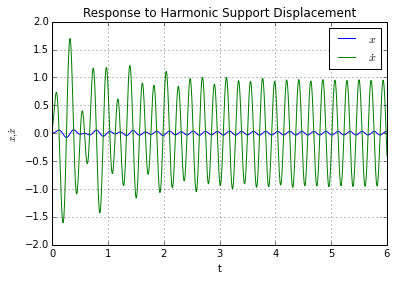

In [25]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def calc_deriv(x, t, cm, km, w, Y):
    x1 = x[1]
    x2 = -cm * x[1] - km * x[0] + cm * w * Y * np.cos(w*t) + km * Y * np.sin(w*t)
    return (np.array([x1, x2]))

m = 1200.0; k = 4e5; xi = 0.05; Y = 0.05; w = 29.0887; x0 = 0.0; v0 = 0.1

c = 2.0 * xi * np.sqrt(k * m)
cm = c / m
km = k / m
y = np.array([0, 1], dtype=np.float32)

t_max = 6.0
npoints = 1001
t = np.linspace(0, t_max, npoints)
x = odeint(calc_deriv, (0.0, 0.1), t, args=(cm, km, w, Y))
plt.plot(t, x[:,0], label='$x$')
plt.plot(t, x[:,1], label='$\dot{x}$')
plt.grid()
plt.xlabel('t')
plt.ylabel('$x, \dot{x}$')
plt.title('Response to Harmonic Support Displacement')
plt.legend(loc='upper right')
plt.show()